In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [2]:
#import CSV file
white_df = pd.read_csv('../Resources/Data/winequality-white.csv', delimiter=';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# drop duplicate data
white_df = white_df.drop_duplicates(keep = 'first', inplace = False)
white_df = white_df.dropna(axis = 'columns', how='all')
white_df = white_df.reset_index(drop = True)
#white_df

In [4]:
white_stats = white_df.describe()
white_stats.drop(["count"], axis=0, inplace=True)
white_stats.T

,mean,std,min,25%,50%,75%,max
fixed acidity,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile acidity,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric acid,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual sugar,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free sulfur dioxide,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total sulfur dioxide,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


In [5]:
#datatype 
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [6]:
# check for null values
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
white_df.shape

(3961, 12)

In [8]:
white_df['quality'].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [9]:
# Features for Quality
bins = [2,6,9]
group_names = ['Fair','Very Good']
white_df['quality'] = pd.cut(white_df['quality'], bins, labels = group_names)

In [10]:
X = white_df.drop("quality", axis =1)
y = white_df["quality"]

In [11]:
white_df['quality'].value_counts()

Fair         3136
Very Good     825
Name: quality, dtype: int64

[0.07102089 0.08110315 0.07288439 0.08116473 0.08128248 0.08350323
 0.08022889 0.10393825 0.08210369 0.07901908 0.1837512 ]


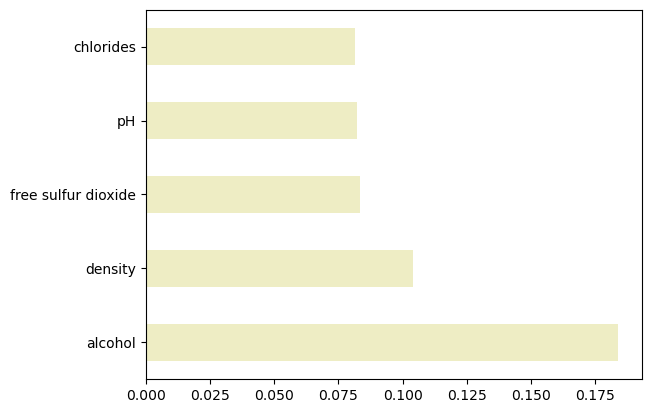

In [12]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind= "barh" , color = "#EEEDC4")

plt.savefig('../Resources/images/white_features_importance_top5.jpg',bbox_inches="tight")
#plt.savefig('../Resources/images/white_features_importance.jpg',bbox_inches="tight")
plt.show()

In [13]:
feat_importances.sort_values(ascending=False)

alcohol                 0.183751
density                 0.103938
free sulfur dioxide     0.083503
pH                      0.082104
chlorides               0.081282
residual sugar          0.081165
volatile acidity        0.081103
total sulfur dioxide    0.080229
sulphates               0.079019
citric acid             0.072884
fixed acidity           0.071021
dtype: float64

# Create a Train Test Split 

## All Features

In [ ]:
# Split the data using train_test_split
# create the train and validation datasets

from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(X, y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

# Pre-pocessing 

In [ ]:
# Scale the data using the StandardScaler 
X_scale = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=20, activation='relu', input_dim=11))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=2, activation='sigmoid'))

In [ ]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model.summary()

In [ ]:
#deep_model.get_config()

In [ ]:
# fit model
history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.2 ,
    epochs=30,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

# Quantify our Trained Model

In [ ]:
#evaluate the model
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

# Make Predictions

In [ ]:
#from sklearn.metrics import classification_report

#encoded_predictions=np.argmax(deep_model.predict(X_test_scaled), axis=-1)
#prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
#print(f"Predicted classes: {prediction_labels}")
#print(f"Actual Labels: {list(y_test[:5])}")

In [ ]:
y_pred = deep_model.predict(X_test_scaled)
y_pred[:5], y_test_categorical[:5]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = y_pred.round()

print(confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1)))

In [ ]:
# classification report 

target_names = ['Fair', 'Very Good']                    
print(classification_report(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

## Results - All Features

In [ ]:
# Plot Confusion Matrix - all features

label_aux = plt.subplot()
cm_dl_white = confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
cm_dl = pd.DataFrame(cm_dl_white,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_dl,annot=True,cmap=plt.cm.YlGnBu,fmt='3')
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');
label_aux.set_title('Normalized (All Features)')
#plt.savefig('../Resources/images/dl_white_cm_nor_all.jpg');
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr , tpr , thresholds = roc_curve(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))

plt.title('ROC (All Features - White Wine)')

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
    
  
plot_roc_curve (fpr,tpr) 
#plt.savefig('../Resources/images/dl_white_auc_all.jpg')
plt.show()

In [ ]:
# AUC Score
auc_score=roc_auc_score(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
auc_score

In [ ]:
# Plot Loss during training - all features
from matplotlib import pyplot
#pyplot.subplot(211)
pyplot.title('Model Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
#plt.savefig('../Resources/images/dl_loss_white_all.jpg')
plt.show()

In [ ]:
# plot accuracy during training
from matplotlib import pyplot
#pyplot.subplot(212)
pyplot.title('Model Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
#plt.savefig('../Resources/images/dl_accuracy_white_all.jpg')
pyplot.show()

# Save the Model

In [ ]:
# Save the Model (test all features, selected features)

#filename = '../Resources/results/dl_white_all.h5'

# Create a Train Test Split 
## Top 5 Features

In [14]:
# Selected important features - top 5
selected_features = X[['alcohol', 'density','free sulfur dioxide','residual sugar','pH']]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(selected_features,y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [16]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((2772, 5), (832, 5), (357, 5), (2772,), (832,), (357,))

# Pre-pocessing 

In [17]:
# Scale the data using the StandardScaler and perform some feature selection
X_scale = StandardScaler().fit(X_train)

In [18]:
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [19]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(2772, 5) (357, 5) (2772,)


In [20]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [21]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=20, activation='relu', input_dim=5))
deep_model.add(Dense(units=20, activation='relu'))
deep_model.add(Dense(units=2, activation='sigmoid'))

In [24]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit model
history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.2 ,
    epochs=30,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

Epoch 1/30
70/70 - 1s - loss: 0.6060 - accuracy: 0.6766 - val_loss: 0.4735 - val_accuracy: 0.8162
Epoch 2/30
70/70 - 0s - loss: 0.4593 - accuracy: 0.7943 - val_loss: 0.4228 - val_accuracy: 0.8360
Epoch 3/30
70/70 - 0s - loss: 0.4375 - accuracy: 0.7993 - val_loss: 0.4016 - val_accuracy: 0.8378
Epoch 4/30
70/70 - 0s - loss: 0.4297 - accuracy: 0.8029 - val_loss: 0.3966 - val_accuracy: 0.8324
Epoch 5/30
70/70 - 0s - loss: 0.4250 - accuracy: 0.8110 - val_loss: 0.3908 - val_accuracy: 0.8378
Epoch 6/30
70/70 - 0s - loss: 0.4227 - accuracy: 0.8069 - val_loss: 0.3911 - val_accuracy: 0.8414
Epoch 7/30
70/70 - 0s - loss: 0.4205 - accuracy: 0.8128 - val_loss: 0.3919 - val_accuracy: 0.8378
Epoch 8/30
70/70 - 0s - loss: 0.4195 - accuracy: 0.8097 - val_loss: 0.3901 - val_accuracy: 0.8396
Epoch 9/30
70/70 - 0s - loss: 0.4172 - accuracy: 0.8106 - val_loss: 0.3912 - val_accuracy: 0.8378
Epoch 10/30
70/70 - 0s - loss: 0.4165 - accuracy: 0.8142 - val_loss: 0.3878 - val_accuracy: 0.8414
Epoch 11/30
70/70 -

# Quantify our Trained Model

In [27]:
#evaluate the model
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

12/12 - 0s - loss: 0.3911 - accuracy: 0.8207
Normal Neural Network - Loss: 0.39112696051597595, Accuracy: 0.8207283020019531


# Make Predictions

In [28]:
#encoded_predictions = deep_model.predict_classes(X_test_scaled[:5])
encoded_predictions=np.argmax(deep_model.predict(X_test_scaled[:5]), axis=-1)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [29]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['Fair' 'Fair' 'Fair' 'Fair' 'Fair']
Actual Labels: ['Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [30]:
y_pred = deep_model.predict(X_test_scaled)
y_pred[:5], y_test_categorical[:5]

(array([[0.88157547, 0.19829416],
        [0.771663  , 0.31752044],
        [0.8439581 , 0.20150241],
        [0.6125463 , 0.32862476],
        [0.67360073, 0.366862  ]], dtype=float32),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32))

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = y_pred.round()

print(confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1)))

[[286   9]
 [ 49  13]]


In [32]:
# classification report 

target_names = ['Fair', 'Very Good']                    
print(classification_report(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))


              precision    recall  f1-score   support

        Fair       0.85      0.97      0.91       295
   Very Good       0.59      0.21      0.31        62

    accuracy                           0.84       357
   macro avg       0.72      0.59      0.61       357
weighted avg       0.81      0.84      0.80       357



##  Results

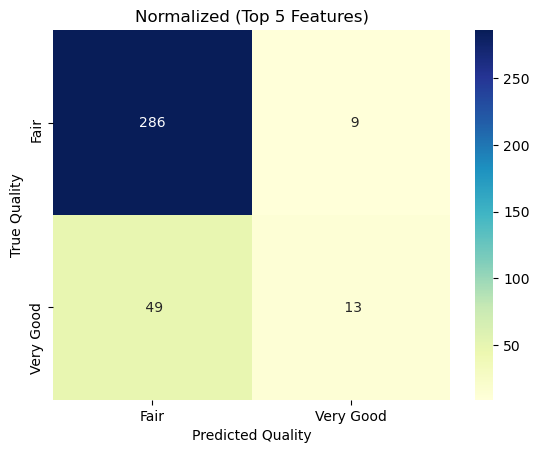

In [34]:
# Plot Confusion Matrix - Top 5 Features
label_aux = plt.subplot()
cm_dl_white = confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
cm_dl = pd.DataFrame(cm_dl_white,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_dl,annot=True,cmap=plt.cm.YlGnBu,fmt='3')
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');
label_aux.set_title('Normalized (Top 5 Features)')
#plt.savefig('../Resources/images/dl_white_cm_nor_selected.jpg');
plt.show()

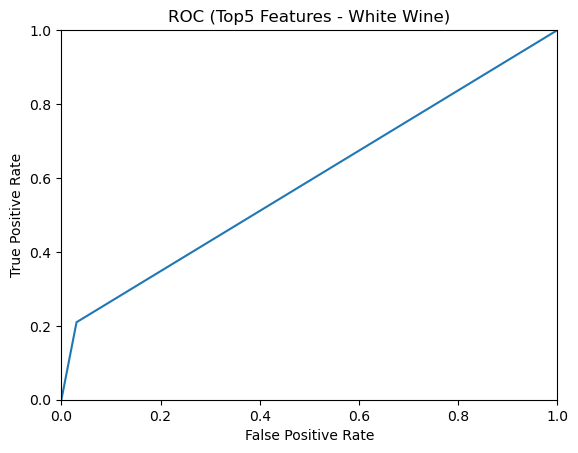

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr , tpr , thresholds = roc_curve(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))

plt.title('ROC (Top5 Features - White Wine)')

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
    
  
plot_roc_curve (fpr,tpr) 
#plt.savefig('../Resources/images/dl_white_auc_top5.jpg')
plt.show()

In [36]:
# AUC score
auc_score=roc_auc_score(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
auc_score

0.5895844723892838

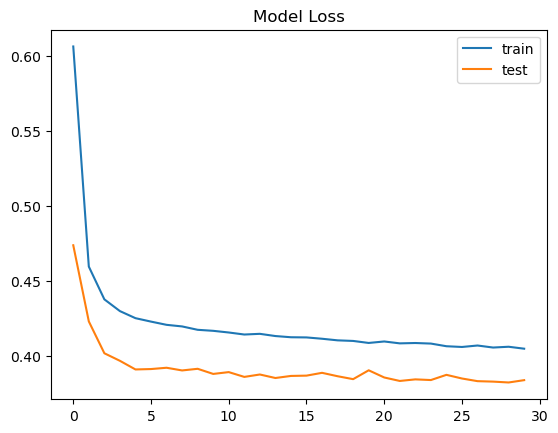

In [38]:
# Plot Loss during training - Top5 Features

from matplotlib import pyplot
#pyplot.subplot(211)
pyplot.title('Model Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
#plt.savefig('../Resources/images/dl_loss_white_selected.jpg')
plt.show()

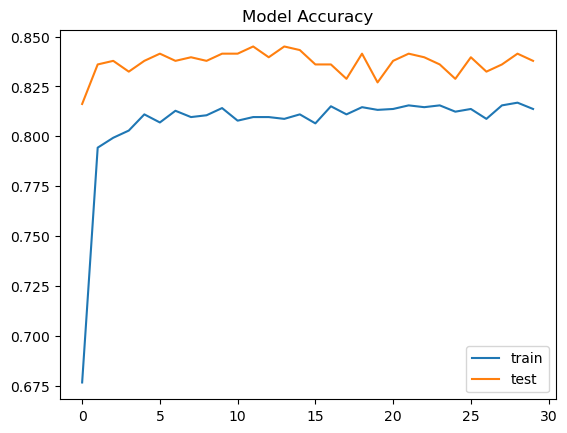

In [39]:
# Plot Loss during Accuracy - Top5 Features

from matplotlib import pyplot
#pyplot.subplot(212)
pyplot.title('Model Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
#plt.savefig('../Resources/images/dl_accuracy_white_selected.jpg')
pyplot.show()

# Save the Model

In [40]:
# Save the Model (test all features, selected features)
#filename = '../Resources/results/dl_white_selected.h5'